In [36]:
import matplotlib.pyplot as plt
import pandas as pd
import os
from sklearn.metrics import confusion_matrix
import numpy as np
from sklearn.linear_model import LinearRegression
model = LinearRegression()
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [37]:
df_d = pd.read_excel(os.path.join('Comed_All.xlsx'))
del df_d['Year']
del df_d['Month']
del df_d['Day']
del df_d['Day_of_Week']
del df_d['Weekend']
del df_d['Datetime']

df_d.head()

MW Utility  Temp(f)
0  10419   COMED     32.0
1   9940   COMED     32.0
2   9604   COMED     35.6
3   9318   COMED     37.4
4   9224   COMED     37.4

In [38]:
df_2016pos = df_d[df_d['Temp(f)'] >= 60].copy()
df_2016neg = df_d[df_d['Temp(f)'] < 60].copy()

In [39]:
droplist = df_2016pos[(df_2016pos['Temp(f)'] < 67) & (df_2016pos['Temp(f)'] > 65) & (df_2016pos.MW > 14150)].index
df_2016pos.drop(droplist,inplace = True)

In [40]:
droplist2 = df_2016pos[(df_2016pos['Temp(f)'] < 75) & (df_2016pos['Temp(f)'] > 70) & (df_2016pos.MW > 18000)].index
df_2016pos.drop(droplist2,inplace = True)

In [41]:
X = df_2016pos["Temp(f)"].values.reshape(-1, 1)
y = df_2016pos["MW"].values.reshape(-1, 1)
print("Shape: ", X.shape, y.shape)

Shape:  (10330, 1) (10330, 1)


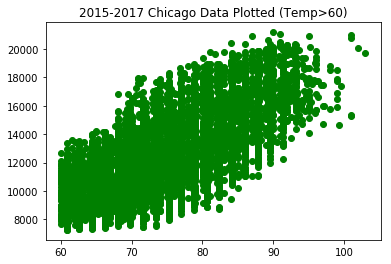

In [42]:
plt.scatter(X, y,color='g')
plt.title("2015-2017 Chicago Data Plotted (Temp>60)")
plt.show()

In [43]:
from sklearn.model_selection import train_test_split
model = LinearRegression()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=14)

In [44]:
model.fit(X_train, y_train)
training_score = model.score(X_train, y_train)
testing_score = model.score(X_test, y_test)

print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 0.4766856194011999
Testing Score: 0.4945185795106794


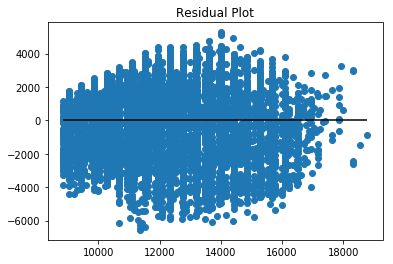

In [45]:
predictions = model.predict(X)
# Plot Residuals
plt.scatter(predictions, predictions - y)
plt.hlines(y=0, xmin=predictions.min(), xmax=predictions.max())
plt.title("Residual Plot")
plt.show()

Text(0.5, 1.0, 'Residual Plot With Trained and Test Data')

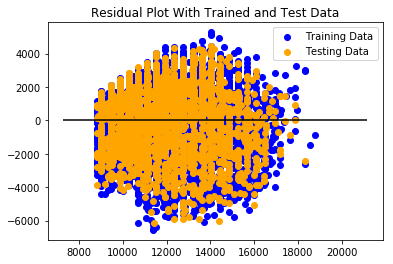

In [46]:
plt.scatter(model.predict(X_train), model.predict(X_train) - y_train, c="blue", label="Training Data")
plt.scatter(model.predict(X_test), model.predict(X_test) - y_test, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y.min(), xmax=y.max())
plt.title("Residual Plot With Trained and Test Data")

In [47]:
print('Weight coefficients: ', model.coef_)
print('y-axis intercept: ', model.intercept_)

Weight coefficients:  [[231.45406591]]
y-axis intercept:  [-5049.80183059]


In [48]:
y_min_actual = y.min()
y_max_actual = y.max()
x_min = X.min()
x_max = X.max()
y_min_predicted = model.predict([[x_min]])
y_max_predicted = model.predict([[x_max]])
print(f"Actual Min Value: {y_min_actual}")
print(f"Predicted Min Value: {y_min_predicted}")
print(f"Actual Max Value: {y_max_actual}")
print(f"Predicted Max Value: {y_max_predicted}")
y_min =  -4929.39529989+ 229.9277851 * x_min
y_max = -4929.39529989+ 229.9277851 * x_max

Actual Min Value: 7263
Predicted Min Value: [[8839.75666465]]
Actual Max Value: 21175
Predicted Max Value: [[18787.65241744]]


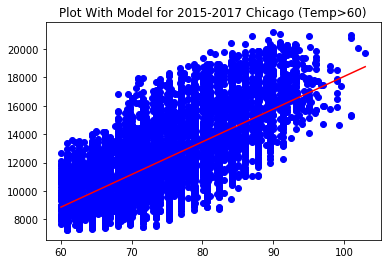

In [49]:
plt.scatter(X, y, c='blue')
plt.title("Plot With Model for 2015-2017 Chicago (Temp>60)")
plt.plot([x_min, x_max], [y_min, y_max], c='red')

In [14]:
predictions = model.predict(X)
print(f"True output: {y[0]}")
print(f"Predicted output: {predictions[0]}")
print(f"Prediction Error: {predictions[0]-y[0]}")

True output: [9036]
Predicted output: [10284.49287476]
Prediction Error: [1248.49287476]


In [15]:
modeldf = pd.DataFrame()
for x in range(len(predictions)):
   modeldf = modeldf.append({"Predicted": predictions[x][0], "Actual": y[x][0], "Error": predictions[x][0] - y[x][0]},ignore_index = True)

In [16]:
for x in range(len(df_2016pos)):
   modeldf.loc[modeldf.Actual == df_2016pos.iloc[x].MW,'Temp'] =df_2016pos.iloc[x]['Temp(f)']

In [17]:
modeldf

Actual        Error     Predicted   Temp
0       9036.0  1248.492875  10284.492875  73.40
1       8550.0  1734.492875  10284.492875  62.60
2       8242.0  2456.104614  10698.104614  68.00
3       8059.0  2639.104614  10698.104614  68.00
4       7980.0  2718.104614  10698.104614  64.40
5       8214.0  2484.104614  10698.104614  60.80
6       8835.0  1035.881135   9870.881135  64.40
7       9849.0    21.881135   9870.881135  71.60
8      10379.0  -508.118865   9870.881135  63.00
9      10728.0 -1270.730604   9457.269396  60.80
10     11407.0 -2363.342344   9043.657656  73.40
11     11088.0 -2044.342344   9043.657656  63.00
12     11190.0 -2146.342344   9043.657656  60.80
13     11159.0 -2115.342344   9043.657656  60.80
14     11517.0 -2059.730604   9457.269396  62.60
15     11344.0 -1059.507125  10284.492875  62.60
16     11347.0  -648.895386  10698.104614  73.40
17     11388.0  -689.895386  10698.104614  60.80
18     11586.0  -887.895386  10698.104614  68.00
19     11686.0 -1815.118865   9870.881135  66.99
20     11281.0  -996.507125  10284.492875  64.99
21     10816.0  -945.118865   9870.881135  80.60
22     10631.0 -1587.342344   9043.657656  63.00
23     11174.0 -1716.730604   9457.269396  60.80
24     11044.0  -759.507125  10284.492875  71.60
25     11383.0   142.328094  11525.328094  75.20
26     11827.0   111.939833  11938.939833  69.80
27     11584.0   768.551573  12352.551573  77.00
28     11311.0   627.939833  11938.939833  62.60
29     10978.0   960.939833  11938.939833  75.99
...        ...          ...           ...    ...
10302  10986.0  -701.507125  10284.492875  66.20
10303  10355.0   -70.507125  10284.492875  66.20
10304  11087.0   298.159671  11385.159671  70.99
10305  10321.0   436.848532  10757.848532  68.26
10306   9799.0   958.848532  10757.848532  68.26
10307   9522.0  1235.848532  10757.848532  68.26
10308   9407.0   760.302882  10167.302882  65.69
10309  10020.0   147.302882  10167.302882  65.69
10310  10889.0  -937.694360   9951.305640  64.75
10311  14064.0   241.718121  14305.718121  83.70
10312  13715.0   177.106381  13892.106381  81.90
10313  13214.0   -34.224948  13179.775052  78.80
10314  12882.0   711.386792  13593.386792  80.60
10315  12828.0   351.775052  13179.775052  78.80
10316  11585.0   353.939833  11938.939833  73.40
10317  12459.0 -3238.408433   9220.591567  61.57
10318  12995.0 -3774.408433   9220.591567  61.57
10319  13585.0 -4364.408433   9220.591567  61.57
10320  14607.0 -4005.404792  10601.595208  67.58
10321  14755.0 -3774.260697  10980.739303  69.23
10322  14278.0 -2991.647578  11286.352422  70.56
10323  13744.0 -2457.647578  11286.352422  70.56
10324  13401.0 -2114.647578  11286.352422  70.56
10325  13089.0 -1703.840329  11385.159671  70.99
10326  12127.0  -741.840329  11385.159671  70.99
10327   9634.0    99.010555   9733.010555  63.80
10328  15655.0 -3242.704509  12412.295491  75.46
10329  11550.0  -472.751291  11077.248709  69.65
10330  11715.0 -2312.878836   9402.121164  62.36
10331  10093.0  -619.645703   9473.354297  62.67

[10332 rows x 4 columns]

In [59]:
X = df_2016neg["Temp(f)"].values.reshape(-1, 1)
y = df_2016neg["MW"].values.reshape(-1, 1)
print("Shape: ", X.shape, y.shape)

Shape:  (9783, 1) (9783, 1)


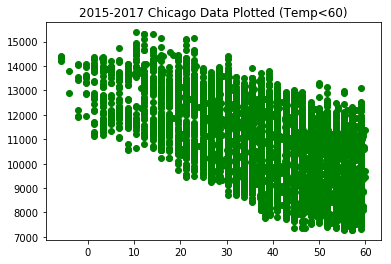

In [60]:
plt.scatter(X, y,color='g')
plt.title("2015-2017 Chicago Data Plotted (Temp<60)")
plt.show()

In [52]:
from sklearn.model_selection import train_test_split
model = LinearRegression()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=6)

In [53]:
model.fit(X_train, y_train)
training_score = model.score(X_train, y_train)
testing_score = model.score(X_test, y_test)

print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 0.28976913560854656
Testing Score: 0.27884734849192194


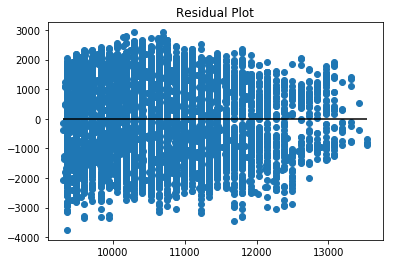

In [54]:
predictions = model.predict(X)
# Plot Residuals
plt.scatter(predictions, predictions - y)
plt.hlines(y=0, xmin=predictions.min(), xmax=predictions.max())
plt.title("Residual Plot")
plt.show()

Text(0.5, 1.0, 'Residual Plot With Trained and Test Data')

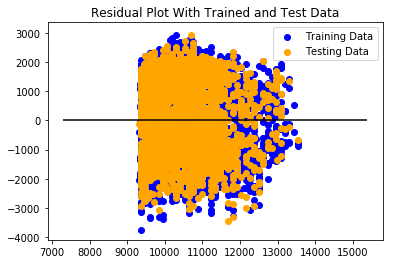

In [55]:
plt.scatter(model.predict(X_train), model.predict(X_train) - y_train, c="blue", label="Training Data")
plt.scatter(model.predict(X_test), model.predict(X_test) - y_test, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y.min(), xmax=y.max())
plt.title("Residual Plot With Trained and Test Data")

In [56]:
print('Weight coefficients: ', model.coef_)
print('y-axis intercept: ', model.intercept_)

Weight coefficients:  [[-64.43548017]]
y-axis intercept:  [13168.1093492]


In [57]:
y_min_actual = y.min()
y_max_actual = y.max()
x_min = X.min()
x_max = X.max()
y_min_predicted = model.predict([[x_min]])
y_max_predicted = model.predict([[x_max]])
print(f"Actual Min Value: {y_min_actual}")
print(f"Predicted Min Value: {y_min_predicted}")
print(f"Actual Max Value: {y_max_actual}")
print(f"Predicted Max Value: {y_max_predicted}")
y_min =  13168.1093492+ (-64.43548017 * x_min)
y_max = 13168.1093492+ (-64.43548017 * x_max)

Actual Min Value: 7286
Predicted Min Value: [[13541.83513419]]
Actual Max Value: 15385
Predicted Max Value: [[9303.91360337]]


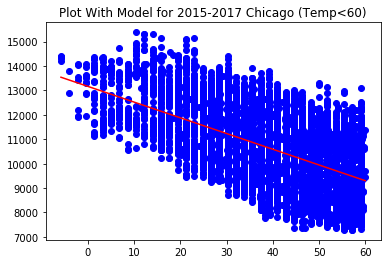

In [58]:
plt.scatter(X, y, c='blue')
plt.title("Plot With Model for 2015-2017 Chicago (Temp<60)")
plt.plot([x_min, x_max], [y_min, y_max], c='red')

In [27]:
predictions = model.predict(X)
print(f"True output: {y[0]}")
print(f"Predicted output: {predictions[0]}")
print(f"Prediction Error: {predictions[0]-y[0]}")

True output: [10419]
Predicted output: [11106.17398374]
Prediction Error: [687.17398374]


In [28]:
modeldf = pd.DataFrame()
for x in range(len(predictions)):
   modeldf = modeldf.append({"Predicted": predictions[x][0], "Actual": y[x][0], "Error": predictions[x][0] - y[x][0]},ignore_index = True)

In [29]:
for x in range(len(df_2016neg)):
   modeldf.loc[modeldf.Actual == df_2016neg.iloc[x].MW,'Temp'] =df_2016neg.iloc[x]['Temp(f)']

In [30]:
modeldf

Actual        Error     Predicted   Temp
0     10419.0   687.173984  11106.173984  24.80
1      9940.0  1166.173984  11106.173984  39.20
2      9604.0  1270.206255  10874.206255  57.99
3      9318.0  1440.222391  10758.222391  55.40
4      9224.0  1534.222391  10758.222391  32.00
5      9209.0  1549.222391  10758.222391  37.40
6      9343.0  1415.222391  10758.222391  55.40
7      9715.0   927.238527  10642.238527  33.80
8      9809.0   717.254662  10526.254662  44.60
9      9974.0   552.254662  10526.254662  30.20
10    10087.0   555.238527  10642.238527  41.00
11    10187.0   455.238527  10642.238527  59.00
12    10299.0   343.238527  10642.238527  42.80
13    10385.0   257.238527  10642.238527  30.20
14    10261.0   265.254662  10526.254662  55.40
15    10313.0   213.254662  10526.254662  57.20
16    10416.0    -5.729202  10410.270798  42.80
17    11037.0  -742.713066  10294.286934  41.00
18    11587.0 -1176.729202  10410.270798  39.20
19    11549.0 -1138.729202  10410.270798  42.80
20    11273.0  -630.761473  10642.238527  27.00
21    11085.0  -326.777609  10758.222391  39.20
22    10801.0   -42.777609  10758.222391  50.00
23    10596.0   278.206255  10874.206255  46.40
24    10137.0   737.206255  10874.206255  35.60
25     9838.0  1152.190119  10990.190119  51.80
26     9715.0  1275.190119  10990.190119  33.80
27     9657.0  1333.190119  10990.190119  46.40
28     9885.0  1105.190119  10990.190119  33.80
29    10392.0   598.190119  10990.190119  55.40
...       ...          ...           ...    ...
9753  10223.0  -856.583981   9366.416019  59.00
9754  10819.0 -1452.583981   9366.416019  59.00
9755  11191.0 -1824.583981   9366.416019  59.00
9756   7874.0  1492.416019   9366.416019  59.00
9757   9059.0   307.416019   9366.416019  59.00
9758   8742.0   624.416019   9366.416019  59.00
9759   8359.0  1007.416019   9366.416019  59.00
9760   8127.0  1239.416019   9366.416019  59.00
9761   8052.0  1314.416019   9366.416019  59.00
9762   8169.0  1262.495854   9431.495854  57.99
9763   8552.0   930.399883   9482.399883  57.20
9764   9218.0   264.399883   9482.399883  57.20
9765  10026.0  -485.608184   9540.391816  56.30
9766  10600.0 -1027.390444   9572.609556  55.80
9767  10990.0 -1552.704953   9437.295047  57.90
9768   9546.0  -179.583981   9366.416019  59.00
9769  10327.0  -960.583981   9366.416019  59.00
9770  10867.0 -1500.583981   9366.416019  59.00
9771  11320.0 -1953.583981   9366.416019  59.00
9772   7579.0  1852.495854   9431.495854  57.99
9773   8125.0  1357.399883   9482.399883  57.20
9774   8755.0   727.399883   9482.399883  57.20
9775   9361.0   134.286979   9495.286979  57.00
9776  11369.0 -2059.287203   9309.712797  59.88
9777  10898.0 -1410.445278   9487.554722  57.12
9778   9214.0   142.106342   9356.106342  59.16
9779   9301.0   464.271641   9765.271641  52.81
9780   8749.0  1016.271641   9765.271641  52.81
9781  10268.0  -795.265439   9472.734561  57.35
9782  10651.0  -906.992067   9744.007933  53.14

[9783 rows x 4 columns]